# QR factorization

Every $m\times n$ matrix with $m\ge n$ has a factorization $A=QR$, with unitary $m\times m$ $Q$ and upper triangular $m\times n$ $R$. By the triangularity, the span of the first $k$ columns of $Q$ contains the span of the first $k$ columns of $A$. Hence when $m>n$, the first $n$ columns of $Q$ span the entire range of $A$. The "reduced" or "thin" form of the factorization keeps only the first $n$ columns of $Q$ and the first $n$ rows of $R$ to get $A=\hat{Q}\hat{R}$. This is most often what one wants in practice, and is much more efficient when $m\gg n$. 

In Julia, the simplest calling syntax gives you a bit of a hybrid.

In [3]:
using LinearAlgebra
A = rand(0.:10.,6,4)

6×4 Array{Float64,2}:
  2.0   4.0  5.0   8.0
  5.0   7.0  8.0   7.0
  7.0   2.0  7.0   5.0
  9.0   8.0  7.0  10.0
 10.0  10.0  8.0   1.0
  5.0   6.0  5.0   5.0

In [12]:
Q,Rhat = qr(A);  # "hybrid" QR
Rhat   # regular thin R

4×4 Array{Float64,2}:
 -16.8523  -15.3688   -15.8435   -12.5205 
   0.0      -5.72707   -2.18323   -3.24319
   0.0       0.0       -4.49621   -6.34972
   0.0       0.0        0.0       -7.50991

As you can see, the returned `Rhat` is just the regular thin $\hat{R}$. But `Q` is a different story:

In [13]:
Q

6×6 LinearAlgebra.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.118678  -0.37996    -0.509357   -0.272643   -0.654545   -0.281669 
 -0.296695  -0.426072   -0.526907    0.192056    0.644205   -0.0303139
 -0.415374   0.765453   -0.464876    0.0892187  -0.0871932   0.099368 
 -0.534052   0.0362745   0.307386   -0.716765    0.232488   -0.226239 
 -0.593391  -0.153706    0.386322    0.595884   -0.247998   -0.241735 
 -0.296695  -0.251462    0.0555367  -0.109497   -0.182797    0.894567 

Notice that the result here has a special type. It looks and acts like the full $Q$ matrix for some purposes, but internally is stored in a special efficient form. If we convert it to a regular matrix, then we get the thin $\hat{Q}$. 

In [16]:
Qhat = Matrix(Q)

6×4 Array{Float64,2}:
 -0.118678  -0.37996    -0.509357   -0.272643 
 -0.296695  -0.426072   -0.526907    0.192056 
 -0.415374   0.765453   -0.464876    0.0892187
 -0.534052   0.0362745   0.307386   -0.716765 
 -0.593391  -0.153706    0.386322    0.595884 
 -0.296695  -0.251462    0.0555367  -0.109497 

There is also a syntax to recover the full $Q$ as a regular matrix. (It isn't simple because it's very rare that you want to do so.) 

In [17]:
Q*Matrix(I,6,6)

6×6 Array{Float64,2}:
 -0.118678  -0.37996    -0.509357   -0.272643   -0.654545   -0.281669 
 -0.296695  -0.426072   -0.526907    0.192056    0.644205   -0.0303139
 -0.415374   0.765453   -0.464876    0.0892187  -0.0871932   0.099368 
 -0.534052   0.0362745   0.307386   -0.716765    0.232488   -0.226239 
 -0.593391  -0.153706    0.386322    0.595884   -0.247998   -0.241735 
 -0.296695  -0.251462    0.0555367  -0.109497   -0.182797    0.894567 

Usually the factorization is not itself a goal but a means to some end. Then one creates a "factorization object." It can return the factors if you want them, but it's more efficient to use the factorization object to solve certain key problems. 

In [18]:
fac = qr(A);  # factorization object
fac.Q  # full Q in special form

6×6 LinearAlgebra.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.118678  -0.37996    -0.509357   -0.272643   -0.654545   -0.281669 
 -0.296695  -0.426072   -0.526907    0.192056    0.644205   -0.0303139
 -0.415374   0.765453   -0.464876    0.0892187  -0.0871932   0.099368 
 -0.534052   0.0362745   0.307386   -0.716765    0.232488   -0.226239 
 -0.593391  -0.153706    0.386322    0.595884   -0.247998   -0.241735 
 -0.296695  -0.251462    0.0555367  -0.109497   -0.182797    0.894567 

In [19]:
Matrix(fac.Q)  # thin Q as a regular matrix

6×4 Array{Float64,2}:
 -0.118678  -0.37996    -0.509357   -0.272643 
 -0.296695  -0.426072   -0.526907    0.192056 
 -0.415374   0.765453   -0.464876    0.0892187
 -0.534052   0.0362745   0.307386   -0.716765 
 -0.593391  -0.153706    0.386322    0.595884 
 -0.296695  -0.251462    0.0555367  -0.109497 

In [22]:
fac.R  # thin R as regular matrix

4×4 Array{Float64,2}:
 -16.8523  -15.3688   -15.8435   -12.5205 
   0.0      -5.72707   -2.18323   -3.24319
   0.0       0.0       -4.49621   -6.34972
   0.0       0.0        0.0       -7.50991

## Orthogonal polynomials

We're focused on vectors in finite dimensions, but many of the concepts and algorithms can be interpreted more abstractly. In the case of QR factorization, the essence of the matter is to find an orthonormal basis for the space spanned by a given collection of vectors. This requires only linear combination and inner products, both of which extend naturally to vector spaces of functions. In the case of the monomials $1,x,x^2,\ldots$, the orthonormal basis is a famous one: the Legendre polynomials. 

For many purposes, we can create finite-dimensional versions that approach the continuous ones in the limit $m\to\infty$.

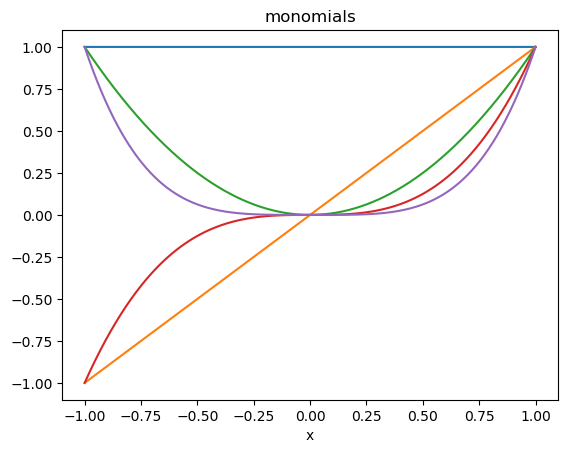

In [29]:
x = -1:1/1000:1;
A = [x[i]^j for i=eachindex(x), j=0:4 ];
using PyPlot
plot(x,A);
xlabel("x"); title("monomials");

The monomials are far from an orthogonal basis:

In [25]:
A'*A

5×5 Array{Float64,2}:
 2001.0            0.0          667.667         -5.68434e-14  401.001      
    0.0          667.667         -5.68434e-14  401.001          2.84217e-14
  667.667         -5.68434e-14  401.001         -2.84217e-14  286.715      
   -5.68434e-14  401.001         -2.84217e-14  286.715         -1.42109e-14
  401.001          2.84217e-14  286.715         -1.42109e-14  223.224      

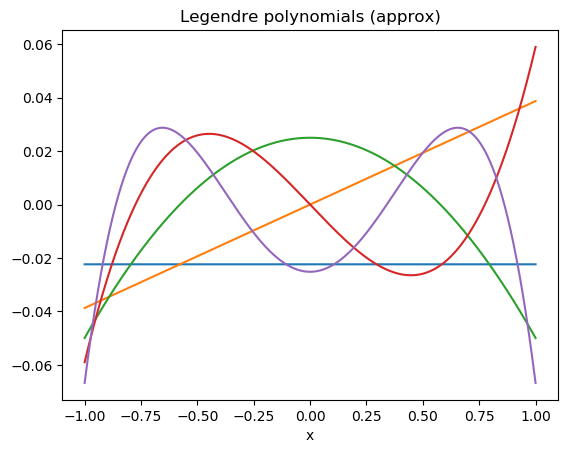

In [28]:
Q,R = qr(A);
plot(x,Matrix(Q));
xlabel("x"); title("Legendre polynomials (approx)");